In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.special import expit
from scipy.optimize import minimize
import warnings

In [15]:
def pad_data(x):
    return np.pad(x, ((0,0), (1,0)),mode='constant', constant_values=1.)

In [16]:
class Logistic:
    def __init__(self, w=None):
        self.w = w
    
    def train(self, xs, ys, w0=None):
        padded_xs = pad_data(xs)
        if w0 is None:
            w0 = np.array([0.]*padded_xs.shape[1])
        def cost(w):
            ps = expit(ys*np.dot(padded_xs, w))
            return -np.sum(np.log(ps))
        res = minimize(cost, w0)
        self.w = res.x
        if not res.success:
            warnings.warn(res.message)
        return self
    
    def predict(self, xs):
        padded_xs = pad_data(xs)
        return expit(np.dot(padded_xs, self.w))

# Basic Performance

Let us consider a fingerprint application to authenticate people through super secret stuff. So the class +1 means authenticate(Staff) and -1 means denied entry(Spy).

## What is True Positive?

## What is False Positive?

## What is False Positive?

## What is False Negative?

## Which of the above number you want to be high and which of the above number you want to be low?

# Confusion Matrix
Consider the folowing for staff(+1) and spy(-1) fingerprint (supposed that you reduce it to two numbers).

In [17]:
np.random.seed(1234)
n_sample = 1000
x1 = np.random.multivariate_normal([2,3],[[1, 0.5],[0.5,1]], size=n_sample)
x2 = np.random.multivariate_normal([3,4],[[1, -0.5],[-0.5,1]], size=n_sample)
xs = np.vstack([x1, x2])
ys = np.array([1.]*n_sample+[-1.]*n_sample)
padded_xs = pad_data(xs)

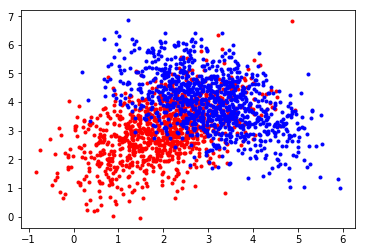

In [18]:
pos_x = xs[ys==1]
neg_x = xs[ys==-1]
plt.plot(pos_x[:,0], pos_x[:,1], '.r')
plt.plot(neg_x[:,0], neg_x[:,1], '.b')

## Consider a classification model defined below.
Find True positive numbers, True Negative numbers, False Positive numbers, False Negative numbers. If your decision whether some one is a spy or a staff based on 0.5 probability.

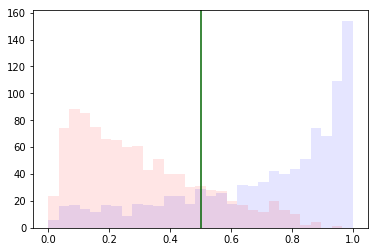

In [19]:
lgst = Logistic().train(xs, ys)
pred = lgst.predict(xs)
plt.hist(pred[ys==1],color='b',bins=np.linspace(0,1,30), alpha=0.1)
plt.hist(pred[ys==-1],color='r',bins=np.linspace(0,1,30), alpha=0.1)
plt.axvline(0.5, color='darkgreen')

In [26]:
cutoff=0.5
true_pos = np.sum((ys > 0) & (pred >= cutoff))
print(true_pos)

true_neg = np.sum((ys < 0) & (pred < cutoff))
print(true_neg)

false_pos = np.sum((ys < 0) & (pred >= cutoff))
print(false_pos)

false_neg = np.sum((ys > 0) & (pred < cutoff))
print(false_neg)

760
820
180
240


### Now put them in this table.
This table is called confusion matrix/table.

**At cut=0.5**

|            	| Pred Staff 	| Pred Spy 	|
|------------	|------------	|----------	|
| True Staff 	|            	|          	|
| True Spy   	|            	|          	|

### If we increase the probability cut, which number will go higher and which number will go lower?

In [27]:
cutoff=0.9
true_pos = np.sum((ys > 0) & (pred >= cutoff))
print(true_pos)

true_neg = np.sum((ys < 0) & (pred < cutoff))
print(true_neg)

false_pos = np.sum((ys < 0) & (pred >= cutoff))
print(false_pos)

false_neg = np.sum((ys > 0) & (pred < cutoff))
print(false_neg)

321
999
1
679


### Draw that confusion matrix again for the cut at 0.9.

## Which cutoff is a better idea if the secret we are guarding is global nuclear launching code?

## Let us change the context of the data. 
If the data were fingerprint for member shopper(+1) vs non-member(-1) shopper, think watson/boots etc. Where if you are classified as a member, you get some made up discount.

# Stupid Metrics People Used

As you have seen that the metric to pick the cutoff really depends on the situation/context. Here are some stupid things(non-context based number) people used as a metric to pick a cut.

## First, Precision and Recall.

Precision is defined by 

$$precision = \frac{tp}{tp+fp}$$


$$recall = \frac{tp}{tp+fn}$$

calculate precision and recall for 0.5 cut and 0.9 cut.

Do you want this number to be high or low?

In [31]:
cutoff=0.5
true_pos = np.sum((ys > 0) & (pred >= cutoff))
print(true_pos)

true_neg = np.sum((ys < 0) & (pred < cutoff))
print(true_neg)

false_pos = np.sum((ys < 0) & (pred >= cutoff))
print(false_pos)

false_neg = np.sum((ys > 0) & (pred < cutoff))
print(false_neg)
print("precision" ,true_pos/(true_pos+false_pos))
print("recall",true_pos/(true_pos+false_neg))

760
820
180
240
0.8085106382978723
0.76


## F1 Score.
This is the dumbest idea yet very popular for "data scientist" who doesn't really know what they are doing.

$$
f1 = 2 \times \frac{precision \times recall}{precision + recall}
$$

If we were to maximize this number where would we put the cut for our fingerprint application both spy+staff and member+non member problem?

Why is this a stupid idea?

49
0.49


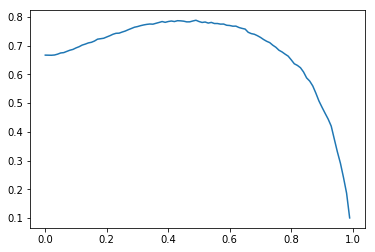

In [39]:
def f1_score(cutoff):
    true_pos = np.sum((ys > 0) & (pred >= cutoff))
#     print(true_pos)

    true_neg = np.sum((ys < 0) & (pred < cutoff))
#     print(true_neg)

    false_pos = np.sum((ys < 0) & (pred >= cutoff))
#     print(false_pos)

    false_neg = np.sum((ys > 0) & (pred < cutoff))
#     print(false_neg)
     
    precision = true_pos/(true_pos+false_pos)
    recall = true_pos/(true_pos+false_neg)
    
    f1=2*recall*precision/(precision + recall)
    return f1
    
cutoffs = np.linspace(0,0.99,100)
f1s = [f1_score(cutoff) for cutoff in cutoffs]
plt.plot(cutoffs,f1s)

best_index = np.argmax(f1s[:-1])
print(best_index)
print(cutoffs[best_index])

# ROC Curve

Let us talk about comparing two different models. Supposed you hired 2 people to build a classification model `lgst1` and `lgst2`. We want to decide which one is better.

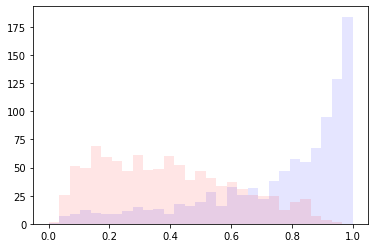

In [35]:
lgst1 = Logistic(np.array([7.1, -1.2, -1]))
pred1 = lgst1.predict(xs)
plt.hist(pred1[ys==1],color='b',bins=np.linspace(0,1,30), alpha=0.1)
plt.hist(pred1[ys==-1],color='r',bins=np.linspace(0,1,30), alpha=0.1);

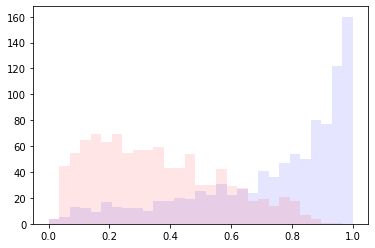

In [38]:
lgst2 = Logistic(np.array([7, -1.2, -1.8]))
pred2 = lgst2.predict(xs)
plt.hist(pred2[ys==1],color='b',bins=np.linspace(0,1,30), alpha=0.1)
plt.hist(pred2[ys==-1],color='r',bins=np.linspace(0,1,30), alpha=0.1);

## Let us define

$TPR = \frac{tp}{tp+fn}$ 
this is called true positive rate/sensitivity/10 other names. Essentially it's the fraction of true sample classified as true over all true sample.

$FPR = \frac{fp}{tn + fp}$
this is called false positive rate/10 other names.
Essentially it's fraction of false smaple classified as true over all negative sample.

If we have a perfect classifier, what should be the value for these two number?

In [44]:
from dataclasses import dataclass  

@dataclass
class Performance:
    true_pos: float
    true_neg: float
    false_pos: float
    false_neg: float

    def tpr(self) -> float:
        return self.true_pos/(self.true_pos + self.false_neg)

    def fpr(self) -> float:
        return self.false_pos/(self.true_neg + self.false_pos)
    
    def precision(self) -> float:
        return self.true_pos/(self.true_pos + self.false_pos)
        
    def recall(self) -> float:
        return self.true_pos/(self.true_pos + self.false_neg)

def cal_perf(cutoff, pred):
    true_pos = np.sum((ys > 0) & (pred >= cutoff)) # staff classified as staff
    true_neg = np.sum((ys < 0) & (pred <= cutoff)) # spy classified as spy
    false_neg = np.sum((ys > 0) & (pred <= cutoff)) # staff classified as spy
    false_pos = np.sum((ys < 0) & (pred >= cutoff)) # spy classified as staff
    
    return Performance(
        true_pos=true_pos,
        true_neg=true_neg,
        false_neg=false_neg,
        false_pos=false_pos
    )

ModuleNotFoundError: No module named 'dataclasses'

In [45]:
from typing import List

pred1 = lgst1.predict(xs)
pred2 = lgst2.predict(xs)

cutoffs = np.linspace(0,1,30)
perf1s = [cal_perf(cutoff, pred1) for cutoff in cutoffs]
perf2s = [cal_perf(cutoff, pred2) for cutoff in cutoffs]

def plot_roc(perfs: List[Performance], **kwd):
    tpr = [p.tpr() for p in perfs]
    fpr = [p.fpr() for p in perfs]
    plt.plot(fpr, tpr, **kwd)
plot_roc(perf1s, label='lgst1')
plot_roc(perf2s, label='lgst2')
plt.legend()

NameError: name 'lgst1' is not defined

## Calculate these two numbers if the cut were at 0.5 for both classifiers.


## ROC Curve
For $cut \in$ `np.linspace(0,1,30)` plot FPR on x axis and TPR on y axis for both classifiers.

### Identify where the perfect classifer should be.

### Identify where the low probability cut(0.01) is and where the high probability cut (0.99) is.

### From the plot which classifiers is better? Why?

### You can see from the above that area is not a bad idea for comparing two classifiers. 

This metric is called aucroc (Area under the curve of ROC). Calculate aucroc for both (mid point/trapezoid would do).

In [51]:
def auc_roc(prefs: List[performance]):
    fprs = [p.fpr() for p in perfs]
    tprs = [p.tpr() for p in perfs]
    area = 0
    for xl, xr, yl, yr in zip(fprs[:-1],fprs[1:],tprs[:-1],tprs[1:]):
        width = xl - xr 
        area += width * 0.5 * (yl + yr)
    return area

print("lgts1 auc roc",auc_roc(perfs1))
print("lgts1 auc roc",auc_roc(perfs2))  


NameError: name 'performance' is not defined

## There are more than one way to make this kind of plot.

We can also plot things like Recall(x) vs Precision(y). If we were to plot that which corner is the perfect answer?

# Multiclass Problem

We want to classify yoyo in to 4 flavors using features such as package color, sweetness level.

Supposed we want to use 1 VS All algorithm. To do this.


## How many classifiers we need to train?

## How do we train each classifier? (Which one to call + and which one to call -)

## Write a table for perfect answer for each class.

## If the answer from all the classifier for a sample looks like 
$$(0.1,0.2,0.3,0.6)$$
What class should it be?

In [57]:
names = ['Grape', 'Cola', 'Apple', 'Strawberry']
template = np.array([
    [1,0,0,0],
    [0,1,0,0],
    [0,0,1,0],
    [0,0,0,1]
],dtype = float)

def find_best_class(output):
    diff =(template-output)**2
    distance = np.sum(diff,axis=1)
    best_index = np.argmin(distance)
    return names[best_index]
    
output = np.array([0.1,0.2,0.3,0.6])
find_best_class(output)


'Strawberry'

## what about
$$(0.6,0.6,0.7,0.7)$$

In [58]:
output = np.array([0.6, 0.6, 0.7, 0.7])
find_best_class(output)

'Apple'

## How many answers we can get wrong before the classifier start getting confused?

## How can we do better against wrong answer?

## Write down the exhaustive matrix for 4 classes.

# Real Exercise

Read glass.data and build a classifier to classify glass.

- Note that there is no sample for glass number 4
- Also use exhaustive matrix.
- To make your life easy forget about splitting it into train test.
- What would print/plot to make sure that your answer make sense?
- Use logistic for each classifiers.
- see glass.names.txt for data description

What is this glass?

$$1.5,14.8,0.00,2.00,73.00,0.00,8.00,1.7,0.00$$